In [93]:
import sys
import os.path as path
import math
import matplotlib.pyplot as plt
import numpy as np
import importlib

sys.path.append("..")
from core import *

import gasnace_swieczki as gs
importlib.reload(gs)
from gasnace_swieczki import *



## Gasnące Świeczki

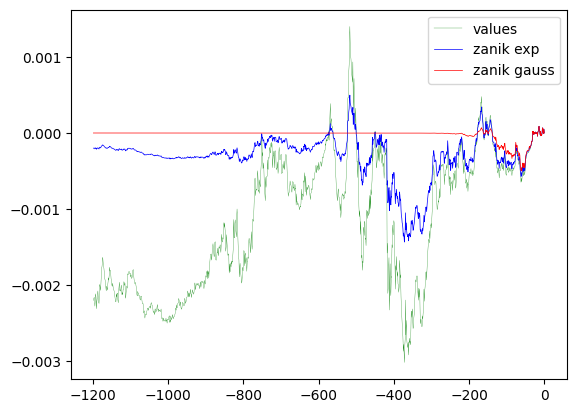

In [90]:
shift = 60
value = VALUE[0 + shift: 1200 + shift]
value = value - value[-1]
time_count = np.array([i for i in range(len(value))], dtype='float64')
time_count = time_count - time_count[-1]


zanik_gauss = np.array([value[i] * gauss(time_count[i]) for i in range(len(time_count))])
zanik_exp = np.array([value[i] * exp(time_count[i]) for i in range(len(time_count))])

plt.plot(time_count, value, label='values', color='green', linewidth=0.2)
plt.plot(time_count, zanik_exp, label='zanik exp', color='blue', linewidth=0.5)
plt.plot(time_count, zanik_gauss, label='zanik gauss', color='red', linewidth=0.5)
plt.legend()
plt.show()


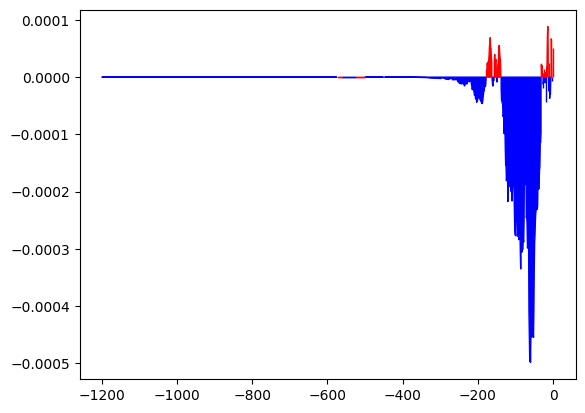

In [91]:
plt.plot(time_count, zanik_gauss, color='black', linewidth=0.0)
plt.fill_between(time_count, zanik_gauss, where=((zanik_gauss < 0)), color='blue')
plt.fill_between(time_count, zanik_gauss, where=((zanik_gauss > 0)), color='red')

plt.show()

c:\Users\stefa\Documents\workspaces\szx81\obrazki_kubusia\current\24-09-05_14-M\.png
c:\Users\stefa\Documents\workspaces\szx81\obrazki_kubusia\future\24-09-05_03-M\.png


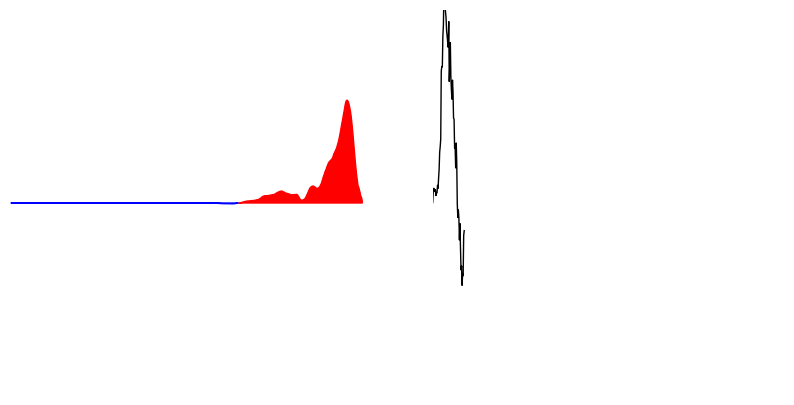

In [92]:
CURRENT_RANGE = 11 * 60
FUTURE_RANGE = 1 * 60
FRAME_SHIFT = 20
Y_RANGE = [-2e-3, 2e-3]

dwa_obrazki(time_start=60, axis_off=True)

SAVED: c:\Users\stefa\Documents\workspaces\szx81\obrazki_kubusia\current\24-09-05_13-M.png
SAVED: c:\Users\stefa\Documents\workspaces\szx81\obrazki_kubusia\future\24-09-05_02-M.png
SAVED: c:\Users\stefa\Documents\workspaces\szx81\obrazki_kubusia\current\24-09-05_13-M.png
SAVED: c:\Users\stefa\Documents\workspaces\szx81\obrazki_kubusia\future\24-09-05_02-M.png
SAVED: c:\Users\stefa\Documents\workspaces\szx81\obrazki_kubusia\current\24-09-05_13-M.png
SAVED: c:\Users\stefa\Documents\workspaces\szx81\obrazki_kubusia\future\24-09-05_02-M.png
SAVED: c:\Users\stefa\Documents\workspaces\szx81\obrazki_kubusia\current\24-09-05_13-M.png
SAVED: c:\Users\stefa\Documents\workspaces\szx81\obrazki_kubusia\future\24-09-05_02-M.png


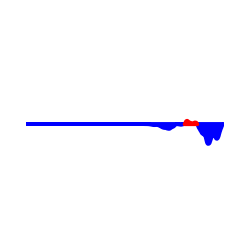

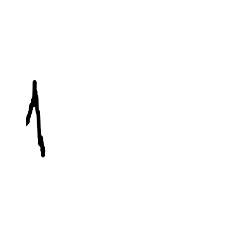

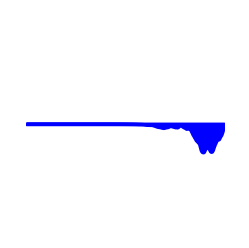

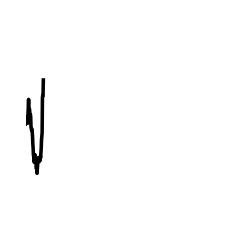

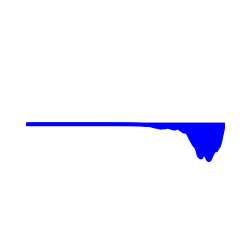

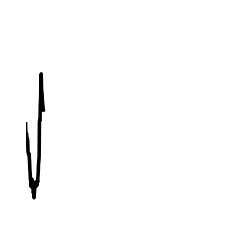

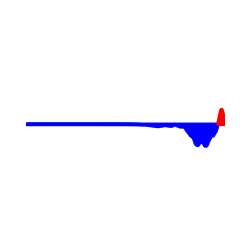

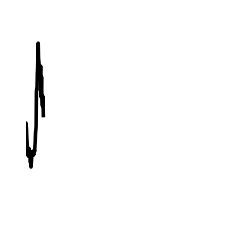

In [94]:
for start_time in [0, 20, 30, 40]:
    save(start_time)